# Comparative Analysis of SSH spectrum for NACHOS12 vs NATL60 Model.

# 0 - Load modules and define functions

In [1]:
import sys
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [2]:
sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')


In [10]:
import Plot_PowerSpec as pp
import plot_box as pb
from nachos12_10_by_10_boxes import boxes

In [11]:
N12_database = '/media/extra/DATA/NACHOS12.L75/NACHOS12.L75-MAA13-S/ssh_1d/'
N60_database = '/media/extra/DATA/NATL60/NATL60-CJM165-S/surf/ssh/'

In [16]:
def mean_pspec(filenames,i,j):
    ''' Compute mean spectrum'''
    _pspec = []
    for filename in filenames:
        spec = np.load(filename)
        kspec = spec['kspec'];
        pspec = spec['pspec'];
        _pspec.append(pspec) 
    pspec_ar = np.array(_pspec)
    mean_pspec = pspec_ar[i:j].mean(axis=0)
    return kspec,mean_pspec

In [17]:
def comp_slope(database,i,j):
    ''' Compute slope of averaged spectrum'''
    slope_10_100 = []
    slope_70_250 = []
    for box in boxes:
        filenames = sorted(glob.glob(database + 'WaveSpec_'+box.name+'_ssh_*.npz'))
        kpsec,pspec = mean_pspec(filenames,i,j)
        m1 = pp.get_slope(kpsec,pspec,10*1E3,100*1E3)
        m2 = pp.get_slope(kpsec,pspec,70*1E3,250*1E3)
        slope_10_100.append(m1)
        slope_70_250.append(m2)
    slope_10_100_arr = np.array(slope_10_100)
    slope_70_250_arr = np.array(slope_70_250)
    return slope_10_100_arr,slope_70_250_arr

In [18]:
# - general slope
k = np.array([1E-6,1E-3])
s3 = k**-3/1.e11
s2 = k**-2/1.e7
s53 = k**(-5./3.)/1.e5

# 1 - Annual Mean

## 1.1 - Annual Mean of KE spectrum

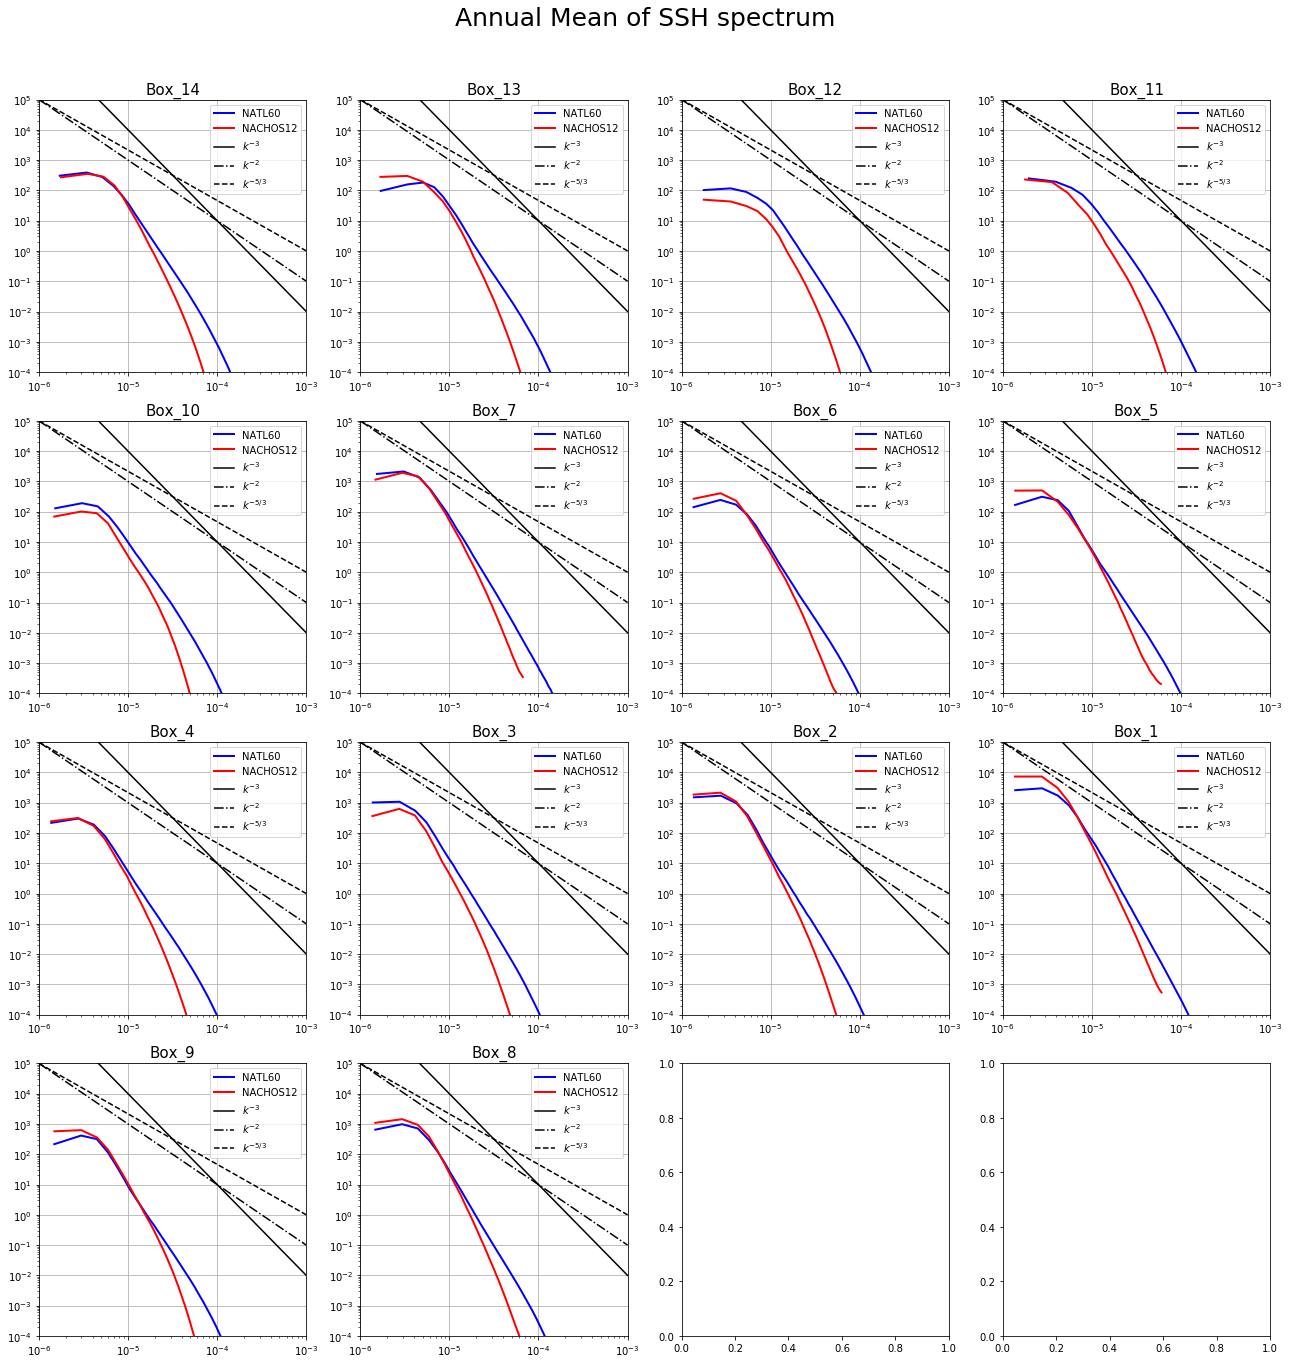

In [19]:
fig, axs = plt.subplots(4,4, figsize=(18, 18))
axs = axs.ravel()
title = 'Annual Mean of SSH spectrum'
plt.suptitle(title,size = 25,y=1.05)

i = 0
for box in boxes:
    N12_filenames = sorted(glob.glob(N12_database + 'WaveSpec_'+box.name+'_ssh_*.npz'))
    N12_kpsec,N12_pspec = mean_pspec(N12_filenames,0,12)
    N60_filenames = sorted(glob.glob(N60_database + 'WaveSpec_'+box.name+'_ssh_*.npz'))
    N60_kpsec,N60_pspec = mean_pspec(N60_filenames,0,12)
    axs[i].loglog(N60_kpsec,N60_pspec,'b',linewidth=2.0,label='NATL60')
    axs[i].loglog(N12_kpsec,N12_pspec,'r',linewidth=2.0,label='NACHOS12')
    axs[i].loglog(k,s3,'k-',label=r'$k^{-3}$')
    axs[i].loglog(k,s2,'k-.',label=r'$k^{-2}$')
    axs[i].loglog(k,s53,'k--',label=r'$k^{-5/3}$')
    axs[i].set_xlim(1E-6,1E-3)
    axs[i].set_ylim(1E-4,1E5)
    axs[i].set_title(box.name,size=15)
    axs[i].legend()
    axs[i].grid(True)
    i = i + 1
    fig.tight_layout()
    
plt.savefig("SSH_spectrum_annual_mean_NACHOS12-NATL60.png")